In [ ]:
'''
Aim: Regression Analysis  
A) Predict the price of the Uber ride from a given pickup point to the agreed drop
off location. Perform following tasks:  
1. Pre-process the dataset.  
2. Identify outliers.  
3. Check the correlation.  
4. Implement linear regression and ridge, Lasso regression models.  
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.  
Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset 
'''

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error


import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the dataset

path = r"D:\uber.csv"
df = pd.read_csv(path)

# view dataset
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [8]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
df = df.dropna()


In [10]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
# print(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
# print(df['hour'])
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
# print(df['day_of_week'])

In [12]:
# check datasets for more columns we added 'hour' and 'day_of_week' column
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,3
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,4
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,4
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,3
...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,10,6
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1,4
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,0,0
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,14,2


In [13]:
# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'key', 'pickup_datetime'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
 6   hour               199999 non-null  int32  
 7   day_of_week        199999 non-null  int32  
dtypes: float64(5), int32(2), int64(1)
memory usage: 12.2 MB


In [15]:
# check datasets for removal of columns we removed 'first_column with no name', 'key' and 'pickup_datetime' column
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,3
...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,6
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,4
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,0
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,2


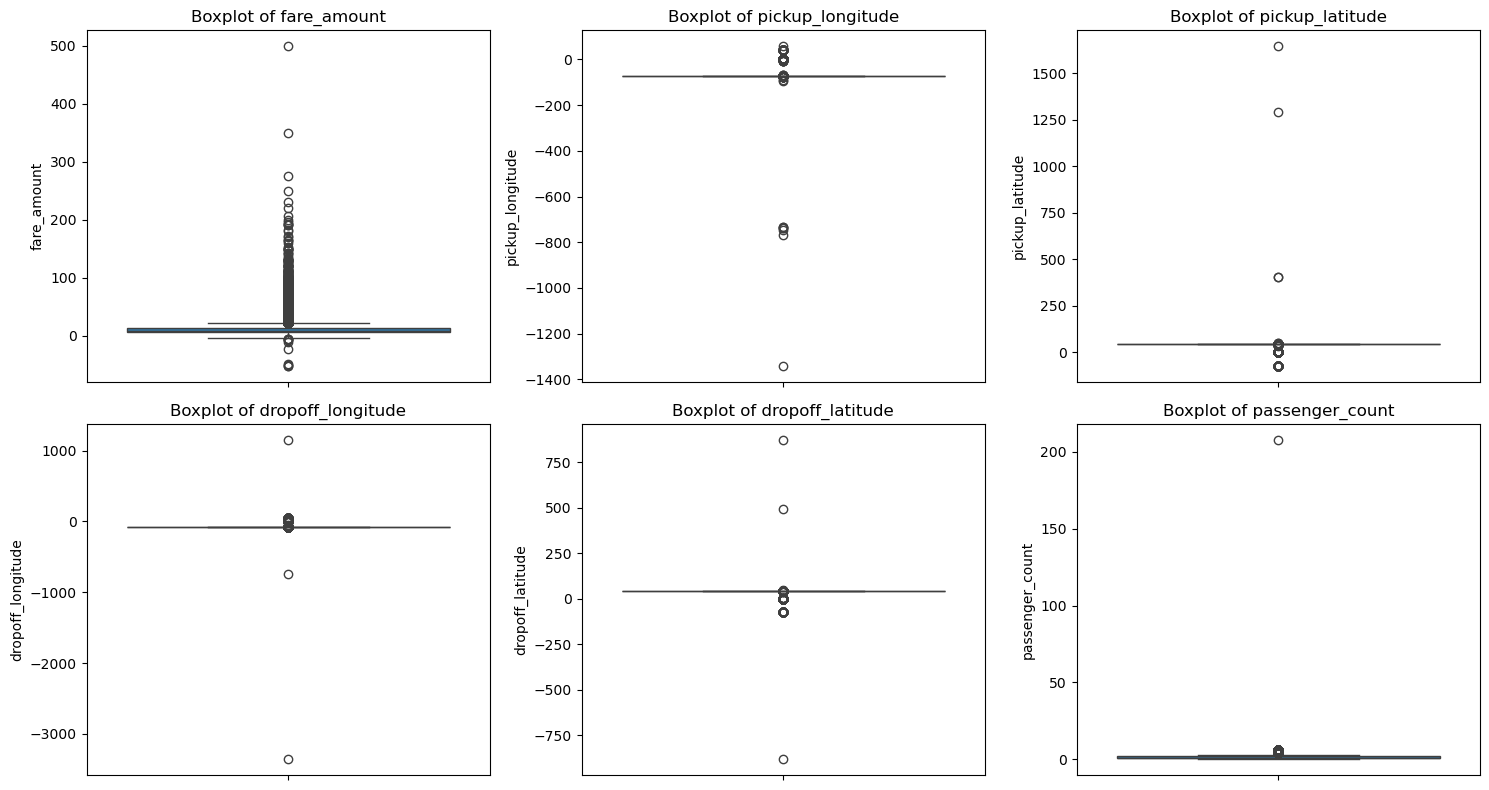

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['fare_amount', 'pickup_longitude', 'pickup_latitude',
                'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [17]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['fare_amount'])  # create new dataset ignoring 'fare_amount' column
y = df['fare_amount']  # create a series of only 'fare_amount' column

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Standardize the features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Implement Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

In [21]:
# Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train_scaled, y_train)
ridge_best = ridge_grid.best_estimator_
y_pred_ridge = ridge_best.predict(X_test_scaled)

# Lasso Regression
lasso = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train_scaled, y_train)
lasso_best = lasso_grid.best_estimator_
y_pred_lasso = lasso_best.predict(X_test_scaled)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    
    return {
        'Model': name,
        'R2 Score': r2,
        'RMSE': rmse,
        'MAE': mae
    }


In [23]:
# Evaluate all models
results = []
results.append(evaluate_model('Linear Regression', y_test, y_pred_lr))
results.append(evaluate_model('Ridge Regression', y_test, y_pred_ridge))
results.append(evaluate_model('Lasso Regression', y_test, y_pred_lasso))

results_df = pd.DataFrame(results)
print("\nModel Evaluation Results:")
print(results_df)


Model Evaluation Results:
               Model  R2 Score       RMSE       MAE
0  Linear Regression  0.000914  10.194550  6.064055
1   Ridge Regression  0.000914  10.194551  6.064055
2   Lasso Regression  0.000870  10.194776  6.064411
